Епоха 1/20, Помилки: 52
Епоха 2/20, Помилки: 2
Епоха 3/20, Помилки: 14
Епоха 4/20, Помилки: 0
Навчання завершено раніше, всі зразки класифіковані правильно.
Точність на тестових даних: 100.00%


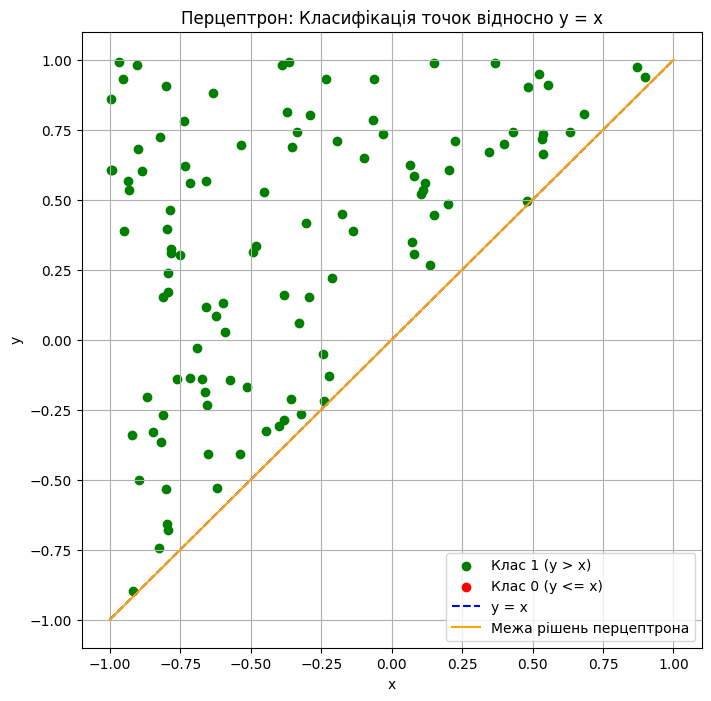

In [1]:
"""
🧠 ПРОСТИЙ ПЕРЦЕПТРОН З НУЛЯ
Автор: Igorich
Мета: Навчити перцептрон розпізнавати, чи лежить точка (x, y)
      вище або нижче діагоналі y = x.
Мова: Python 3
Бібліотеки: numpy, matplotlib

🧩 Що буде зроблено:
1. Згенеруємо дані (точки)
2. Реалізуємо перцептрон з нуля
3. Навчимо його класифікувати
4. Візуалізуємо результат
"""
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_data(n=1000):
    X = np.random.uniform(-1, 1, (n, 2))
    y = np.array([1 if x[1] > x[0] else 0 for x in X])
    return X, y

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=50):
        """
        Ініціалізація перцептрона.
        :param input_size:  - розмірність вхідних даних (кількість ознак)
        :param learning_rate: - швидкість навчання
        :param epochs:  - кількість епох навчання
        """
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 для зсуву (bias)

    def activation(self,  x):
        return np.where(x >= 0, 1, 0) # Softmax активація

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1) # Додаємо зсув
        z = np.dot(self.weights, x_with_bias) # Лінійна комбінація
        return self.activation(z)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            total_errors = 0
            for xi, target in zip(X, y):
                xi_with_bias = np.insert(xi, 0, 1) # Додаємо зсув
                output = self.activation(np.dot(self.weights, xi_with_bias))
                update = self.lr * (target - output)
                self.weights += update * xi_with_bias
                total_errors += int(update != 0.0)

            print(f"Епоха {epoch+1}/{self.epochs}, Помилки: {total_errors}")

            if total_errors == 0:
                print("Навчання завершено раніше, всі зразки класифіковані правильно.")
                break

    def score(self, X, y):
        correct = 0
        for xi, target in zip(X, y):
            prediction = self.predict(xi)
            if prediction == target:
                correct += 1
        return correct / len(y)

def plot_decision_boundary(model,  X, y):
    plt.figure(figsize=(8, 8))

    # Дані
    plt.scatter(X[y == 1][:, 0], X[y==1][:, 1], color="green", label="Клас 1 (y > x)")
    plt.scatter(X[y == -1][:, 0], X[y==-1][:, 1], color="red", label="Клас 0 (y <= x)")

    # Межа рішень
    plt.plot([-1, 1], [-1, 1], color="blue", linestyle="--", label="y = x")

    # лінія рішень перцептрона
    w = model.weights

    x_points = np.linspace(-1, 1, 100)
    y_points = -(w[0] + w[1] * x_points) / w[2]
    plt.plot(x_points, y_points, color="orange", label="Межа рішень перцептрона")

    plt.title("Перцептрон: Класифікація точок відносно y = x")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    # Генерація даних
    X_train, y_train = generate_data(800)
    X_test, y_test = generate_data(200)

    # Ініціалізація та навчання перцептрона
    perceptron = Perceptron(input_size=2, learning_rate=0.05, epochs=20)
    perceptron.fit(X_train, y_train)

    # Оцінка точності
    acc = perceptron.score(X_test, y_test)
    print(f"Точність на тестових даних: {acc * 100:.2f}%")

    # Візуалізація результатів
    plot_decision_boundary(perceptron, X_test, y_test)

if __name__ == "__main__":
    main()